# Kaggle Titanic Challenge

In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv('train1.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [7]:
data_clean = data.drop(columns_to_drop,axis = 1)

In [8]:
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [10]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [14]:
# Imputer --> sklearn

In [15]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols = ['Survived']

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)

(891, 6) (891, 1)


# Decision Tree using Sklearn

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [71]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
sk_tree.predict(test_data[input_cols])

array([0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1.

In [73]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.7755775577557755

## Clean test data

In [78]:
test_data = pd.read_csv('test1.csv')

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [81]:
columns_to_drop = ["Name","Ticket","Cabin","Embarked"]

In [82]:
test_clean = test_data.drop(columns_to_drop,axis = 1)

In [83]:
test_clean.head(n=5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_clean['Sex'] = le.fit_transform(test_clean['Sex'])

In [85]:
test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [86]:
test_clean = test_clean.fillna(test_clean['Age'].mean())

In [87]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [125]:
passenger = test_clean.values[:,0]

X_test = test_clean.drop(["PassengerId"],axis = 1)
print(passenger)

[ 892.  893.  894.  895.  896.  897.  898.  899.  900.  901.  902.  903.
  904.  905.  906.  907.  908.  909.  910.  911.  912.  913.  914.  915.
  916.  917.  918.  919.  920.  921.  922.  923.  924.  925.  926.  927.
  928.  929.  930.  931.  932.  933.  934.  935.  936.  937.  938.  939.
  940.  941.  942.  943.  944.  945.  946.  947.  948.  949.  950.  951.
  952.  953.  954.  955.  956.  957.  958.  959.  960.  961.  962.  963.
  964.  965.  966.  967.  968.  969.  970.  971.  972.  973.  974.  975.
  976.  977.  978.  979.  980.  981.  982.  983.  984.  985.  986.  987.
  988.  989.  990.  991.  992.  993.  994.  995.  996.  997.  998.  999.
 1000. 1001. 1002. 1003. 1004. 1005. 1006. 1007. 1008. 1009. 1010. 1011.
 1012. 1013. 1014. 1015. 1016. 1017. 1018. 1019. 1020. 1021. 1022. 1023.
 1024. 1025. 1026. 1027. 1028. 1029. 1030. 1031. 1032. 1033. 1034. 1035.
 1036. 1037. 1038. 1039. 1040. 1041. 1042. 1043. 1044. 1045. 1046. 1047.
 1048. 1049. 1050. 1051. 1052. 1053. 1054. 1055. 10

# Random Forests

In [126]:
X_train = X
Y_train = Y

X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891, 1), (418, 6))

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 5)

In [132]:
rf.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
rf.score(X_train,Y_train)

0.8507295173961841

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

In [136]:
print(acc)

0.8204549847204771


In [137]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators = i,max_depth = 5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

In [138]:
print(acc_list)

[0.7520847142000442, 0.790186599200578, 0.7913228907006097, 0.7924779424828897, 0.8070975928323664, 0.8193629164188643, 0.8148557674746355, 0.8069905989353098, 0.8036449916252539, 0.813751074105952, 0.8114660078935041, 0.8126149953879495, 0.7969409391560427, 0.8159792920529103, 0.8058855509299108, 0.8193439433545867, 0.8137699762428865, 0.8070219842846285, 0.8171344856898767, 0.81041174386576, 0.7991943363097993, 0.7924780134102327, 0.8249810358016404, 0.8182833313296358, 0.8226896215919857, 0.817121931550149, 0.8171219315501489, 0.8058983178516677, 0.8193502204244505, 0.8026031398825513, 0.8048000434075341, 0.814843142407565, 0.818176195577893, 0.8182518750529738, 0.8137385908935675, 0.8182582230501808, 0.8092628272986577, 0.8159793629802536, 0.817121931550149, 0.8204865119244822, 0.8115605895055195, 0.8148999197457112, 0.8025716126785463, 0.8137699762428865, 0.8059362639802226, 0.8182266249188326, 0.8003243507399672, 0.8182266249188326, 0.8081329547231759]


In [139]:
import matplotlib.pyplot as plt

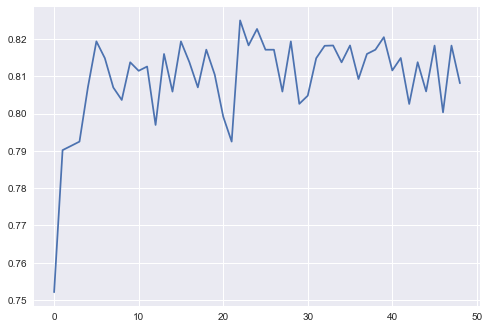

In [140]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [141]:
print(np.argmax(acc_list))

22


In [142]:
rf_test = RandomForestClassifier(n_estimators = 23, max_depth = 5, criterion = 'entropy')

In [143]:
rf_test.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
rf_test.score(X_train,Y_train)

0.8540965207631874

In [145]:
output = rf_test.predict(X_test)

In [146]:
rf_test.score(X_test,output)

1.0

In [155]:
df1 = pd.DataFrame(output, columns = ["Survived"])
df2 = pd.DataFrame(passenger, columns = ["PassengerId"])
df2 = df2.astype(int)

In [156]:
df1.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [157]:
df2.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [158]:
result = pd.concat([df2, df1], axis=1, sort=False)

In [159]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [160]:
result.to_csv('kaggletitanic.csv',index = False)